In [1]:
from final_functions import *

### (Opcional) Extracción de frames

In [2]:
# video_path = '/Users/diegosilveracoeff/Downloads/Video_Rami.mp4'
# output_folder = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain'
video_path = '/Users/diegosilveracoeff/Downloads/Lana_Lucho.mp4'
output_folder = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho'
#video_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/Lana_Lucho.mp4'
frame_nums = [32, 33]  # Números de frames que deseas extraer


extract_frames(video_path, frame_nums, output_folder)

Frame 32 guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/frame_32.tif
Frame 33 guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/frame_33.tif


### Defino rutas de trabajo y cargo imágenes

En las siguientes celdas se importan la imagen de referencia y la imagen objetivo

Valor mínimo de diferencia:  0
Valor máximo de diferencia:  255
Valor mínimo de diferencia con clip==False:  0
Valor máximo de diferencia con clip==False:  255
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/residual_frame.tif
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/sign_matrix.tif
Valor máximo de img3: 255


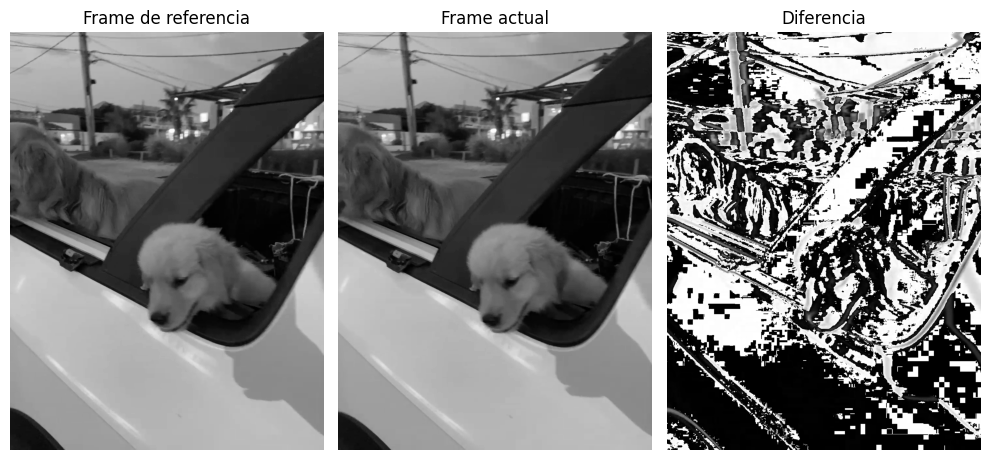

In [3]:
folder_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho' #Cambiar por path de trabajo
reference_frame_path = os.path.join(folder_path, 'frame_32.tif')
current_frame_path = os.path.join(folder_path, 'frame_33.tif')
residual_1_path = os.path.join(folder_path, 'residual_frame.tif')
sign_1_path = os.path.join(folder_path, 'sign_matrix.tif')

tittles = ['Frame de referencia','Frame actual','Diferencia']

def subtract_frames_3(current_frame_path, reference_frame_path, residual_path, sign_path, clip=True):
    '''
    Función que lee dos imágenes, hace la diferencia, clippea el resultado para guardar en 8 bits y lo guarda en un path especificado
    INPUT: Video file, list with frames indexes, output folder
    OUTPUT: None
    '''
    # Lee las imágenes
    img1 = cv2.imread(current_frame_path, cv2.IMREAD_GRAYSCALE)#.astype(np.int8)
    img2 = cv2.imread(reference_frame_path, cv2.IMREAD_GRAYSCALE)

    # Verifica si las imágenes se leyeron correctamente
    if img1 is None or img2 is None:
        print("Error al leer las imágenes.")
        return

    # Realiza la resta de las imágenes
    diff_img = img1 - img2

    #Verifico el rango dinámico de la diferencia
    print('Valor mínimo de diferencia: ', np.min(diff_img))
    print('Valor máximo de diferencia: ', np.max(diff_img))

    if clip == True:
        # Clippeo entre -128 y 127, pierdo información de valores de diferencia altos
        diff_img_adjusted = ((diff_img - (-128)) * (255 / (127 - (-128)))).clip(0, 255).astype(np.uint8)
        sign_diff_img = None

    else:
        # Me quedo con el valor absoluto de cada valor, pierdo información de signo pero no de diferencia (misma energía en imagen residual)
        diff_img_adjusted = np.abs(diff_img)
        sign_diff_img = np.sign(diff_img)

        print('Valor mínimo de diferencia con clip==False: ', np.min(diff_img_adjusted))
        print('Valor máximo de diferencia con clip==False: ', np.max(diff_img_adjusted))

    # Guarda la imagen resultante como PNG
    cv2.imwrite(residual_path, diff_img_adjusted, [cv2.IMWRITE_TIFF_COMPRESSION, 1])
    print(f"Resultado de la resta ajustado y guardado como {residual_path}")
    cv2.imwrite(sign_path, diff_img_adjusted, [cv2.IMWRITE_TIFF_COMPRESSION, 1])
    print(f"Resultado de la resta ajustado y guardado como {sign_path}")

    return diff_img_adjusted, sign_diff_img

diff_img, sign_diff_img = subtract_frames_3(current_frame_path, reference_frame_path, residual_1_path, sign_1_path, clip=False)

def plot_three_images_3(img1_path, img2_path, img3_path, tittles):

    #Leo imágenes
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE).astype(np.int16)

    print('Valor máximo de img3:', np.max(img3))

    # Crear figura y ejes para los subplots
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    # Subplot 1
    axs[0].imshow(img1, cmap='gray', vmin=0, vmax=np.max(img1))
    axs[0].set_title(tittles[0])
    axs[0].axis('off')
    #plt.colorbar(ax=axs[0])

    # Subplot 2
    axs[1].imshow(img2, cmap='gray', vmin=0, vmax=np.max(img2))
    axs[1].set_title(tittles[1])
    axs[1].axis('off')
    #plt.colorbar(ax=axs[1])

    # Subplot 3
    axs[2].imshow(img3, cmap='gray', vmin=0, vmax=np.max(img3))
    axs[2].set_title(tittles[2])
    axs[2].axis('off')

    plt.tight_layout()  # Ajustar espaciado entre subplots
    plt.show()
    return

plot_three_images_3(reference_frame_path, current_frame_path, residual_1_path, tittles)

(1280, 960, 2)
flow_x guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/flow_x.npy
flow_y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/flow_y.npy
Visualización del flujo óptico guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/optical_flow_visualization.png


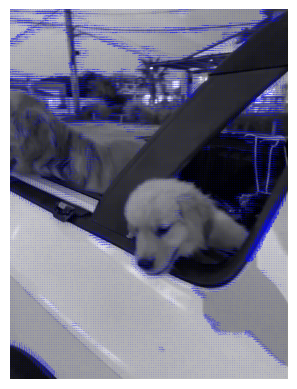

In [4]:
#Calculo el flujo óptico entre el frame de referencia y el frame actual

optical_flow(current_frame_path, reference_frame_path, folder_path)

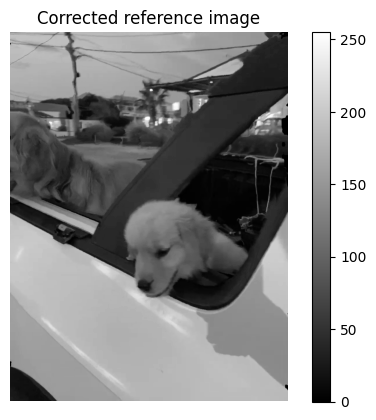

In [5]:
#Cargo el flujo óptico y hago motion_compensation

flow_x_path = os.path.join(folder_path, 'flow_x.npy')
flow_y_path = os.path.join(folder_path, 'flow_y.npy')

corrected_reference_path = os.path.join(folder_path, 'corrected_reference.tif')
motion_compensation_2(reference_frame_path, current_frame_path, flow_x_path, flow_y_path, corrected_reference_path)

Valor mínimo de diferencia:  0
Valor máximo de diferencia:  255
Valor mínimo de diferencia con clip==False:  0
Valor máximo de diferencia con clip==False:  255
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/residual_2.tif
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Lana_Lucho/sign_2.tif


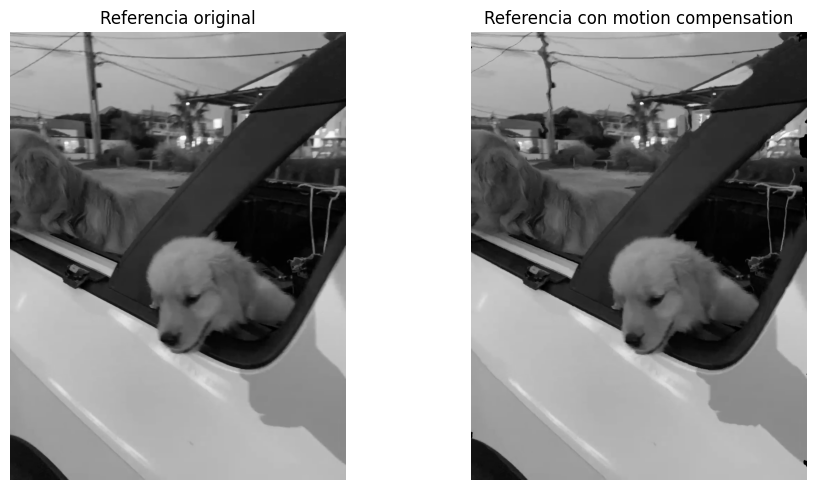

In [6]:
#Celda de control, en las gaussianas sintéticas debería obtener 0s

residual_2_path = os.path.join(folder_path, 'residual_2.tif')
sign_2_path = os.path.join(folder_path, 'sign_2.tif')
subtract_frames(corrected_reference_path, current_frame_path, residual_2_path, sign_2_path, clip=False)

plot_two_images(reference_frame_path, corrected_reference_path, ['Referencia original', 'Referencia con motion compensation'])

La energía de residual_frame.tif es 421836141
La energía de residual_2.tif es 306472272


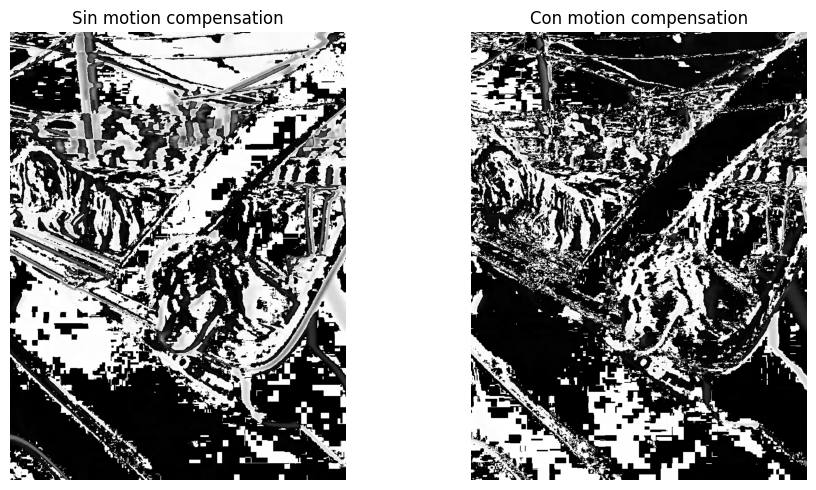

In [7]:
#Celda de control, la energía del residual que se calculó teniendo en cuentra 
#el motion_compensation debe ser menor.

energy(residual_1_path)
energy(residual_2_path)

plot_two_images(residual_1_path,residual_2_path, ['Sin motion compensation','Con motion compensation'])

### Transformada coseno y cuantización

In [8]:
#Calculo la DCT del residual y cuantizo

dct_path = os.path.join(folder_path, 'DCT.tif')
q_path = os.path.join(folder_path, 'quantized_image.tif')

dct_image = dct_2(residual_2_path, dct_path)
q_image, q_array = quantization(dct_image, 10, q_path)

#print(q_array)

#plot_one_img(dct_path)

In [9]:
reordered_array = reorder_array(q_array)

print(reordered_array)


[(0, 930) (0,  10) (0, -60) ... (0, -20) (0, -20) (0,  40)]


In [10]:
#Calculo la probabilidad de ocurrencia de cada valor de la DCT cuantizada y armo el codebook

count = count_pixel_values(reordered_array)
print(count)
print(len(count))
symbols, codes = huffman_codebook(count)

np.save(os.path.join(folder_path,'symbols.npy'), symbols)
print(f"symbols guardados como {os.path.join(folder_path,'symbols.npy')}")
np.save(os.path.join(folder_path,'codes.npy'), codes)
print(f"codes guardado como {os.path.join(folder_path,'codes.npy')}")

[('(0, -920)', 12), ('(0, -910)', 1), ('(0, -900)', 3), ('(0, -890)', 4), ('(0, -880)', 6), ('(0, -870)', 3), ('(0, -860)', 8), ('(0, -850)', 31), ('(0, -840)', 10), ('(0, -830)', 8), ('(0, -820)', 20), ('(0, -810)', 13), ('(0, -800)', 21), ('(0, -790)', 9), ('(0, -780)', 18), ('(0, -770)', 15), ('(0, -760)', 20), ('(0, -750)', 30), ('(0, -740)', 13), ('(0, -730)', 19), ('(0, -720)', 21), ('(0, -710)', 31), ('(0, -700)', 28), ('(0, -690)', 35), ('(0, -680)', 38), ('(0, -670)', 32), ('(0, -660)', 33), ('(0, -650)', 85), ('(0, -640)', 54), ('(0, -630)', 42), ('(0, -620)', 44), ('(0, -610)', 28), ('(0, -600)', 44), ('(0, -590)', 49), ('(0, -580)', 54), ('(0, -570)', 79), ('(0, -560)', 59), ('(0, -550)', 57), ('(0, -540)', 63), ('(0, -530)', 67), ('(0, -520)', 71), ('(0, -510)', 79), ('(0, -500)', 90), ('(0, -490)', 93), ('(0, -480)', 96), ('(0, -470)', 135), ('(0, -460)', 85), ('(0, -450)', 101), ('(0, -440)', 96), ('(0, -430)', 123), ('(0, -420)', 169), ('(0, -410)', 157), ('(0, -400)', 

In [11]:
#Sustituyo cada símbolo por su código y escribo el archivo con el fillout_number

bin_path = os.path.join(folder_path, 'message.bin')
write_encoded_file_2(reordered_array, symbols, codes, bin_path)

Largo de la imagen codificada (mensaje) 3447071
Fillout_number:  1
000000010111010011011001000101010100010001011000111110110010010000011000101111011110111010100111101110110110100110111100011100011100001111010000100010101101111100010000011101000010110111111011010010100000011000010010011010110010010100111101011001111001110111101000110110101110011101010111111111100111001110101110010001000001110011110001001010111001011111100111010111011010011011001110011001111010111110000110101110001001101011011111111101011110000011111100001101110001100001000110000111100111101110101100000110110110111001100100000001011111001010001001010000011011101001111111010001110101000100100110110000011100101101101011101000010001111101100101111001110010101111011010010011000111010111100011010111110100110000001110110011011100001111100110101011001111001001100101110011010110100010101001100111110111001111000101010100111000101100110011010000001101000001011000111101100101000001110011010101010010000001010110000001110011000001101